In [1]:
import opendatasets as od  

In [2]:
od.download('https://www.kaggle.com/datasets/absin7/zomato-bangalore-dataset')

Skipping, found downloaded files in ".\zomato-bangalore-dataset" (use force=True to force download)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READ CSV FILE

In [4]:
df = pd.read_csv(r'C:\Users\sanika\Downloads\archive(1)\zomato-bangalore-dataset\zomato.csv')

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.shape

(51717, 17)

In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# DELETE UNWANTED COLUMNS

In [8]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)  #we delete the columns that we don't want to analyse with drop
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


# DROP DUPLICATE ROWS

In [10]:
df.drop_duplicates(inplace = True)  #drop rows which are repeated
df.shape
# 51609 rows are unique

(51609, 11)

# ALTERING RATE COLUMN

In [11]:
df['rate'].unique() #rate column has duplicate values to get unique values

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**function to replace new and - with nan and return only float values of rate**

In [12]:
#from above list we see rate has values other than rating like NEW and - to remove that we create a function
def handlerate(value):  #handlerate will take one value at a time from rate column
    if(value=='NEW' or value=='-'):  #if value is NEW or - replace it with nan
        return np.nan
    else:  
        value = str(value).split('/')  #else convert value to string and split it at / and return the before and after characters
        value = value[0]  #now value is a list that contains the rate and 5 but we want only value so 
        return float(value)  #the only value is returned in float form in the rate column
    
df['rate'] = df['rate'].apply(handlerate)  #apply used to apply function on rate column of df dataframe
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
df['rate'].fillna(df['rate'].mean(), inplace = True)  #rate column madhle null values mean of rate ni replace karayche
df['rate'].isnull().sum() #ata null nahiyea mhanun isnull cha sum 0 ala

0

**replece nan with 0**

In [14]:
df.info()  #rate contain all 51609 not null objects

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


# DROP NULL VALUES 

In [15]:
df.dropna(inplace = True)  #inplace means make change in original dataframe don't create a new dataframe
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# RENAMING COLUMNS

In [16]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True) #changing column names 
df.head() 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [17]:
df['location'].unique() #display unique values in location column

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [18]:
df['listed_in(city)'].unique()  #display unique values in listed_city column 

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [19]:
df = df.drop(['listed_in(city)'], axis = 1)  #drop city column as location is already there 

# ALTERING COST OF PLATE COLUMN

In [20]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [21]:
def handlecomma(value):  #removing comma from the cost values
    value = str(value)  #convert value to string
    if ',' in value:   #search for , character in string
        value = value.replace(',', '') #replace , with nothing
        return float(value) #convert value to float and return
    else:
        return float(value)
    
df['Cost2plates'] = df['Cost2plates'].apply(handlecomma)  #use handlecomma method on column costof2plates
df['Cost2plates'].unique() #display unique values from that column

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [22]:
df.head() #see initial rows of dataframe

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# ALTERING REST TYPE COLUMN

In [23]:
rest_types = df['rest_type'].value_counts(ascending  = False) #ascending is false so displayed in descending order 
#i.e the type occuring most is displayed first
rest_types
#value_counts finds unique values in column and counts how many times they have occured and display their count in front of them 
# eg Quick Bytes is a unique value and it appeared 19010 times in the rest_type column

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

**separate rest_types occuring less than 1000 times i.e those with count<1000**

In [24]:
rest_types_lessthan1000 = rest_types[rest_types<1000] #rest_types madhlya ashya values which are less than 1000 that are least occuring
rest_types_lessthan1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

**change all those with count<1000 to others and display their count as sum of all the individual counts**

In [25]:
def handle_rest_type(value): #rest type column values 1000 or less than 1000 are converted to others
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)  #apply function of rest_type column
df['rest_type'].value_counts()  #find unique values in rest_type column and display their count i.e no of times they have occured

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

# ALTERING LOCATION COLUMN

In [26]:
location=df['location'].value_counts(ascending=False) #location column madhle unique locations shodhayche ani te kiti vela occur zalay
#tyacha count display karaycha in descending order i.e location occuring most in column location is displayed first
location

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

**segregate locations occuring less than 300 times to a category of others**

In [27]:
less_than300=location[location<300]

def handle_location(value):
    if value in less_than300:
        return 'others'
    else:
        return value
    
df['location']=df['location'].apply(handle_location)
df['location'].value_counts(ascending=False)

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

# ALTERING CUISINES COLUMN

In [28]:
cuisines=df['cuisines'].value_counts(ascending=False)
#cuisine column madhli pratyek value(cuisine like punjabi,chinese) cha count i.e no of times that cuisine is occuring in that column
cuisines

cuisines
North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2704, dtype: int64

**segragating less occuring cuisines(those with count less than 100) in category of others**

In [29]:
less_than100=cuisines[cuisines<100]
less_than100

cuisines
North Indian, Continental, Chinese          97
Juices                                      94
Fast Food, North Indian                     93
Bengali, North Indian                       93
Beverages, Juices                           90
                                            ..
North Indian, Chinese, Oriya, Mithai         1
Beverages, Burger                            1
North Indian, Mughlai, Lucknowi              1
Continental, Thai, North Indian, Chinese     1
North Indian, Chinese, Arabian, Momos        1
Name: count, Length: 2635, dtype: int64

In [30]:
def handle_cuisines(value):
    if value in less_than100:
        return 'others'
    else:
        return value
    
df['cuisines']=df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts(ascending=False)

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

# VISUALIZATIONS

**location count i.e no of times location is occuring in the location column**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

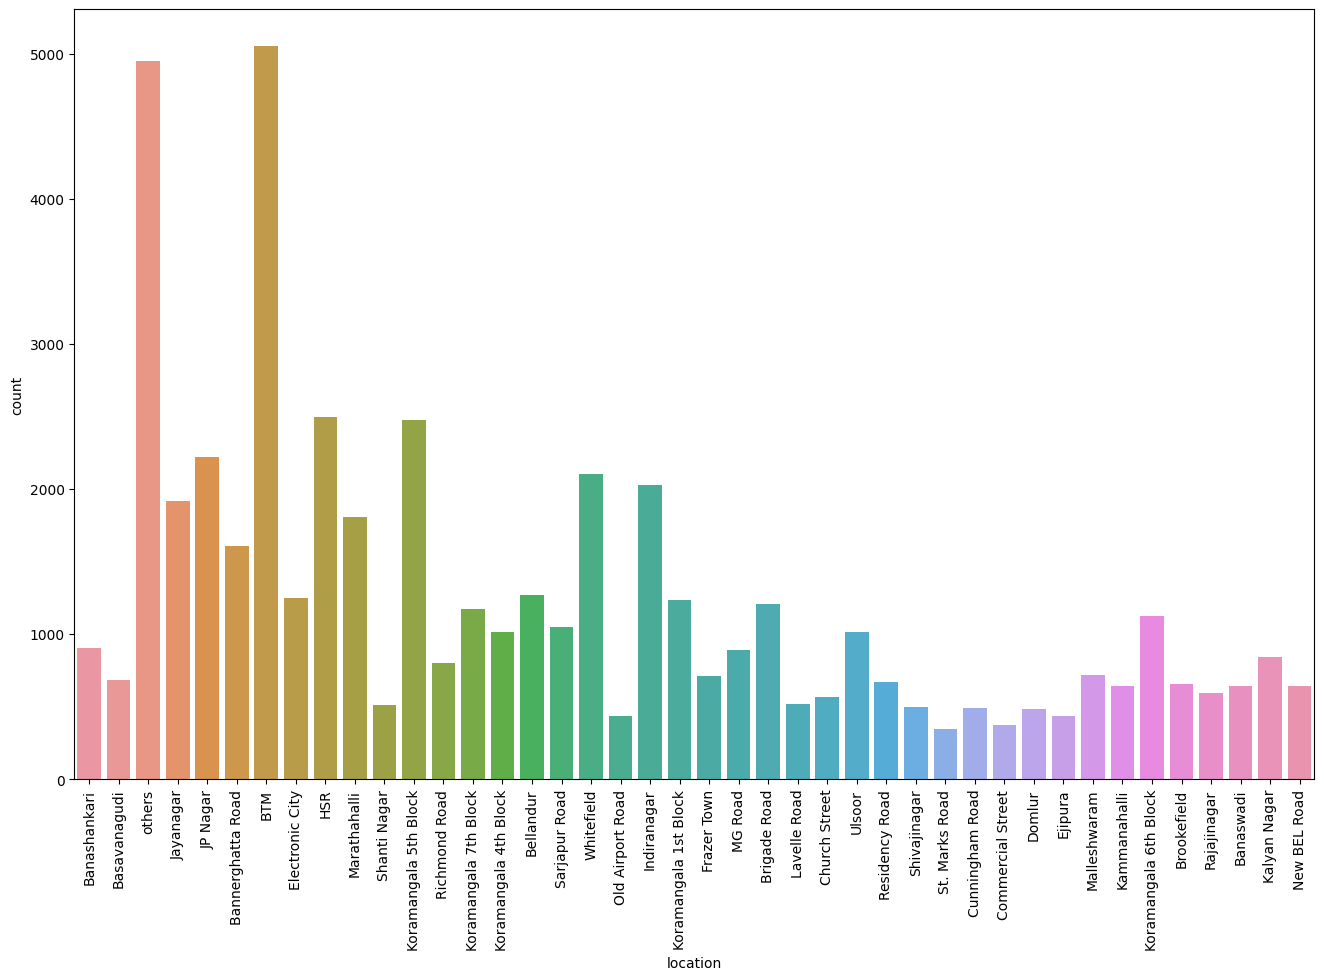

In [31]:
plt.figure(figsize = (16,10))  #plot figure(can be any graph,donut chart,etc) with 16 inches width and 10 inches height
ax = sns.countplot(x=df['location'])  #sns is short form for seaborn countplot takes unique values from location column and display their count
plt.xticks(rotation=90)  #the x axis labels of locations are too long so they may overap so they are rotated by 90 degree with this function

**online orders yes or no count**

<Axes: xlabel='online_order', ylabel='count'>

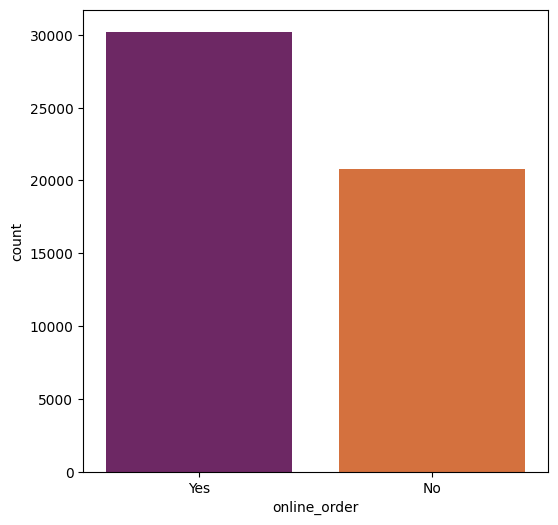

In [32]:
plt.figure(figsize = (6,6))  #size of figure 6 width and 6 height(inches)
sns.countplot(x=df['online_order'], palette = 'inferno')  #countplot takes unique values from online_order column on x axis and shows their count on y axis
#inferno is type of color palette in seaborn

**booking table yes or no count**

<Axes: xlabel='book_table', ylabel='count'>

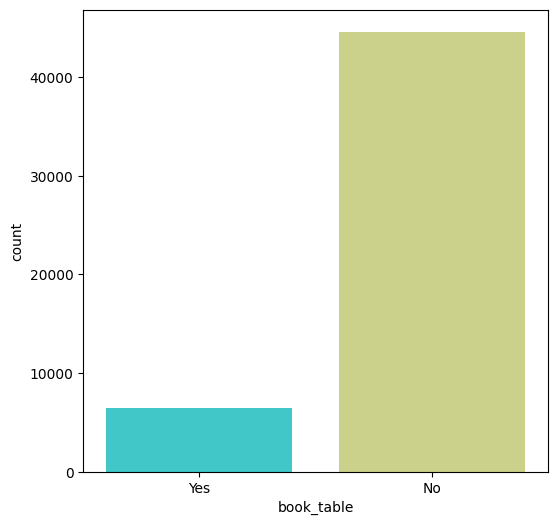

In [33]:
plt.figure(figsize = (6,6))  #figure sixe 6 width and 6 height
sns.countplot(x=df['book_table'], palette = 'rainbow')  #book_table column che unique values x axis var ani tyacha count y axis var
#color palette type is rainbow

# VISUALIZATION WITH 2 COLUMNS

**online order v/s rate**

<Axes: xlabel='online_order', ylabel='rate'>

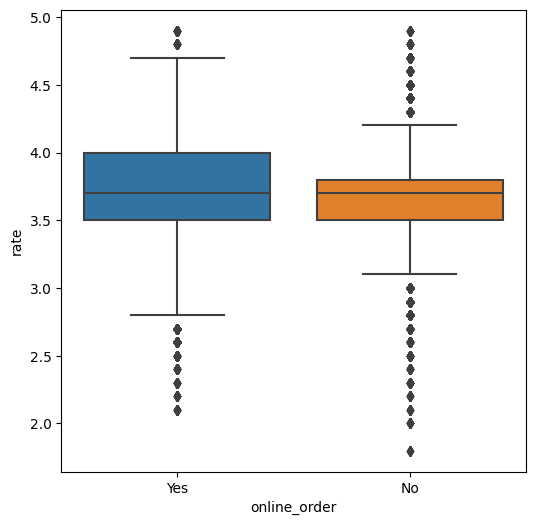

In [34]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)  #boxplot with online order column values on x axis and rate column values on y axis

**online order v/s location**

In [35]:
df1 = df.groupby(['location','online_order'])['name'].count()  #yes and no are repeating so convert these to columns and display the count in them
#in front of location
df1

location      online_order
BTM           No              1763
              Yes             3293
Banashankari  No               397
              Yes              505
Banaswadi     No               302
                              ... 
Ulsoor        Yes              622
Whitefield    No               986
              Yes             1119
others        No              2064
              Yes             2890
Name: name, Length: 84, dtype: int64

In [36]:
df1 = df.groupby(['location','online_order'])['name'].count()  #group by finds all unique combinations of location and online order column and select column name to count
#non null values present in it

df1.to_csv('location_online.csv')  #this data is converted to csv file with 3 columns location,order and name
df1 = pd.read_csv('location_online.csv') #again it is read
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1
#pivot_table is a pandas function to create a summary table containing aggregate values
#pivot table is prepared on dataframe df1
#values to be aggregated are none
#location column is chosen as index column
#all the values from online order columns are convertec to separate columns
#all the null values are filled with 0
#on both the columns displaying count of online order based on location sum function is applied to check how many times online order is placed from a particular location

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<Axes: xlabel='location'>

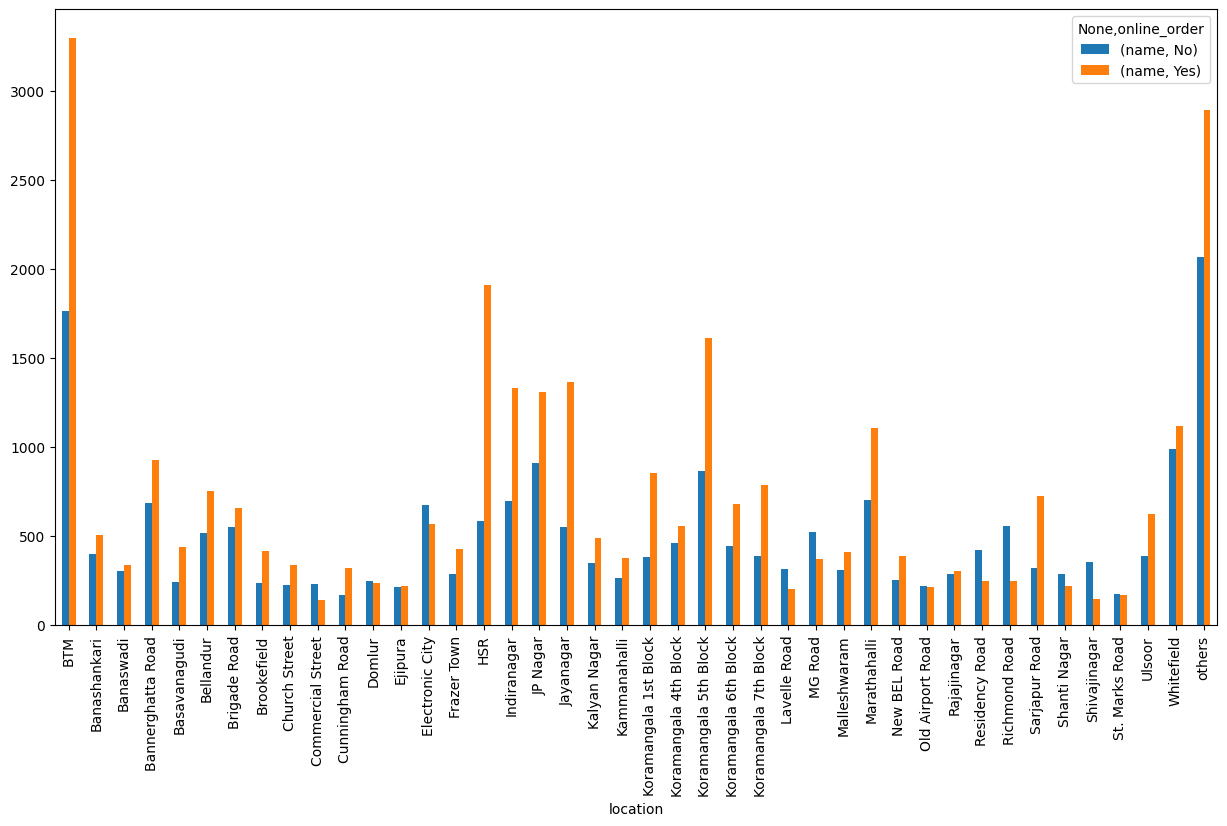

In [40]:
df1.plot(kind = 'bar', figsize = (15,8))  #bar plot for df1

#location on  xaxis the count of yes\no on y axis and yes/no by joint bar graph

**location v/s book table yes/no**

In [43]:
df2=df.groupby(['location','book_table'])['name'].count() #location and book tablle columns madhle unique combinations and 
#tyancha count i.e how many times this combination occured
df2.to_csv('location_book_table.csv')
df2=pd.read_csv('location_book_table.csv')
df2=pd.pivot_table(df2,values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
#pivot table creates table on df2 with index column of location and other columns of unique values in book_table column i.e 
# yes and no
#fill null values with 0 and apply aggregate function sum

<Axes: xlabel='location'>

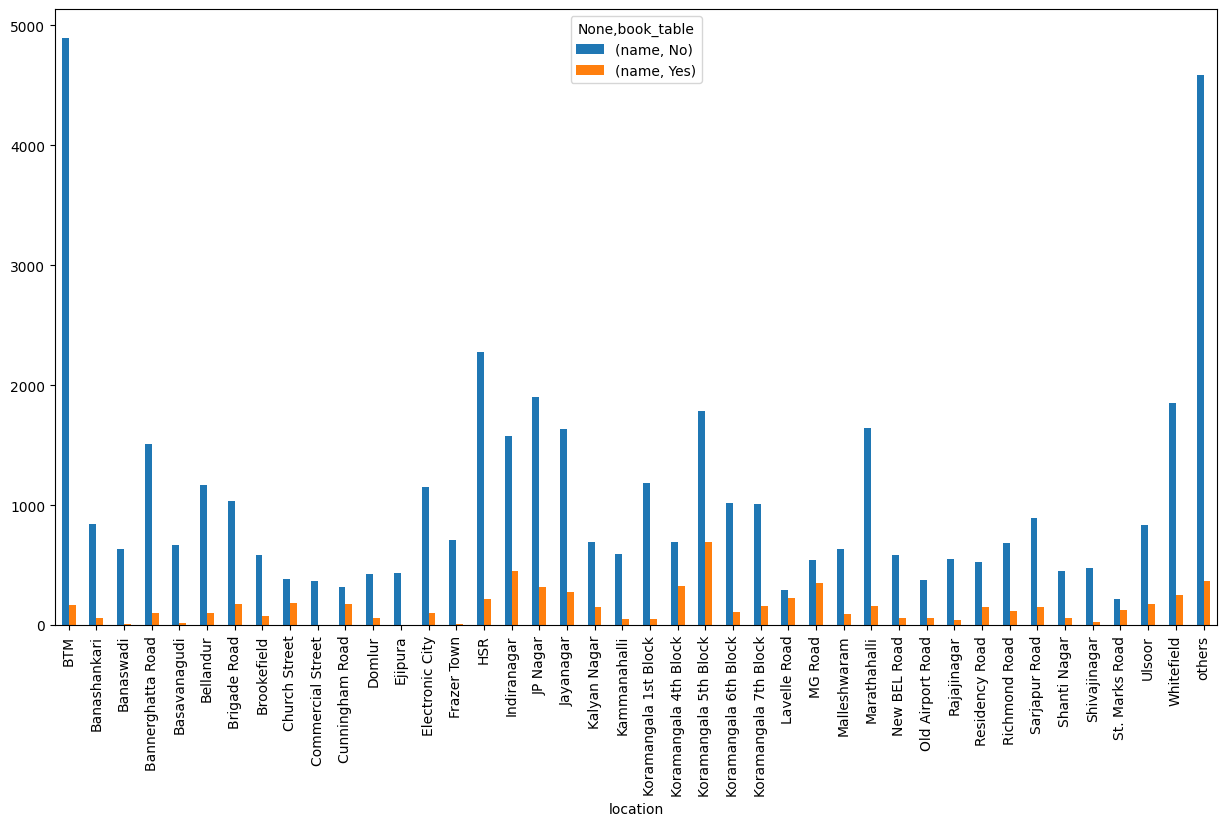

In [44]:
df2.plot(kind='bar',figsize=((15,8)))

**location v\s type of restuarant**

In [47]:
df3=df.groupby(['location','rest_type'])['name'].count()
df3.to_csv('location_type.csv')
df3=pd.read_csv('location_type.csv')
df3=pd.pivot_table(df3,values=None,index=['location'],columns=['rest_type'],fill_value=0,aggfunc=np.sum)

In [51]:
df3

name                                                 \
rest_type             Bakery Cafe Casual Dining Casual Dining, Bar Delivery   
location                                                                      
BTM                       76  290           711                 22      254   
Banashankari              20   87           148                  1       28   
Banaswadi                 27   44           106                  9       13   
Bannerghatta Road         53   79           312                 10       69   
Basavanagudi              35   42            98                  8        0   
Bellandur                 16   55           295                 28       60   
Brigade Road              30  111           289                 26        0   
Brookefield               23   35           135                 12        6   
Church Street              0   92           151                 71        0   
Commercial Street          6   20            71                  0        0   
Cunningham Road            3   46           202                  0        4   
Domlur                    26   11            90                 11       58   
Ejipura                    0    0            27                  0       45   
Electronic City           39   43           282                 19       61   
Frazer Town               33   35           147                  0       61   
HSR                       33  141           541                 23      186   
Indiranagar               28  189           477                 51      171   
JP Nagar                  63  158           543                 53      123   
Jayanagar                 59  201           481                 18       14   
Kalyan Nagar              17   75           240                  9       31   
Kammanahalli               2   51           143                 10       24   
Koramangala 1st Block     42   97           102                 57      107   
Koramangala 4th Block     33  138           179                 44      121   
Koramangala 5th Block     28  351           559                 81       50   
Koramangala 6th Block     14  109           216                  0       80   
Koramangala 7th Block     25  117           283                 59       97   
Lavelle Road              20    5            79                113       10   
MG Road                    3  102           172                 30        6   
Malleshwaram              15   58           115                 14        7   
Marathahalli              49   67           392                 46      109   
New BEL Road               9   73           113                  2       22   
Old Airport Road          23    9            72                  8       32   
Rajajinagar               16    6           112                 16       12   
Residency Road             0   57           152                  9       14   
Richmond Road             10   43           203                 14        8   
Sarjapur Road             52   48           198                 16       95   
Shanti Nagar               6   46           145                  0       13   
Shivajinagar               6   22            43                 23        0   
St. Marks Road             0   20            95                 60        0   
Ulsoor                    38  129           174                 48       27   
Whitefield                58   65           451                 37      137   
others                   104  315           909                 72      419   

                                                                            
rest_type             Dessert Parlor Quick Bites Takeaway, Delivery others  
location                                                                    
BTM                              111        2707                334    551  
Banashankari                      47         428                 17    126  
Banaswadi                         12         325                 22     82  
Banner

<Axes: xlabel='location'>

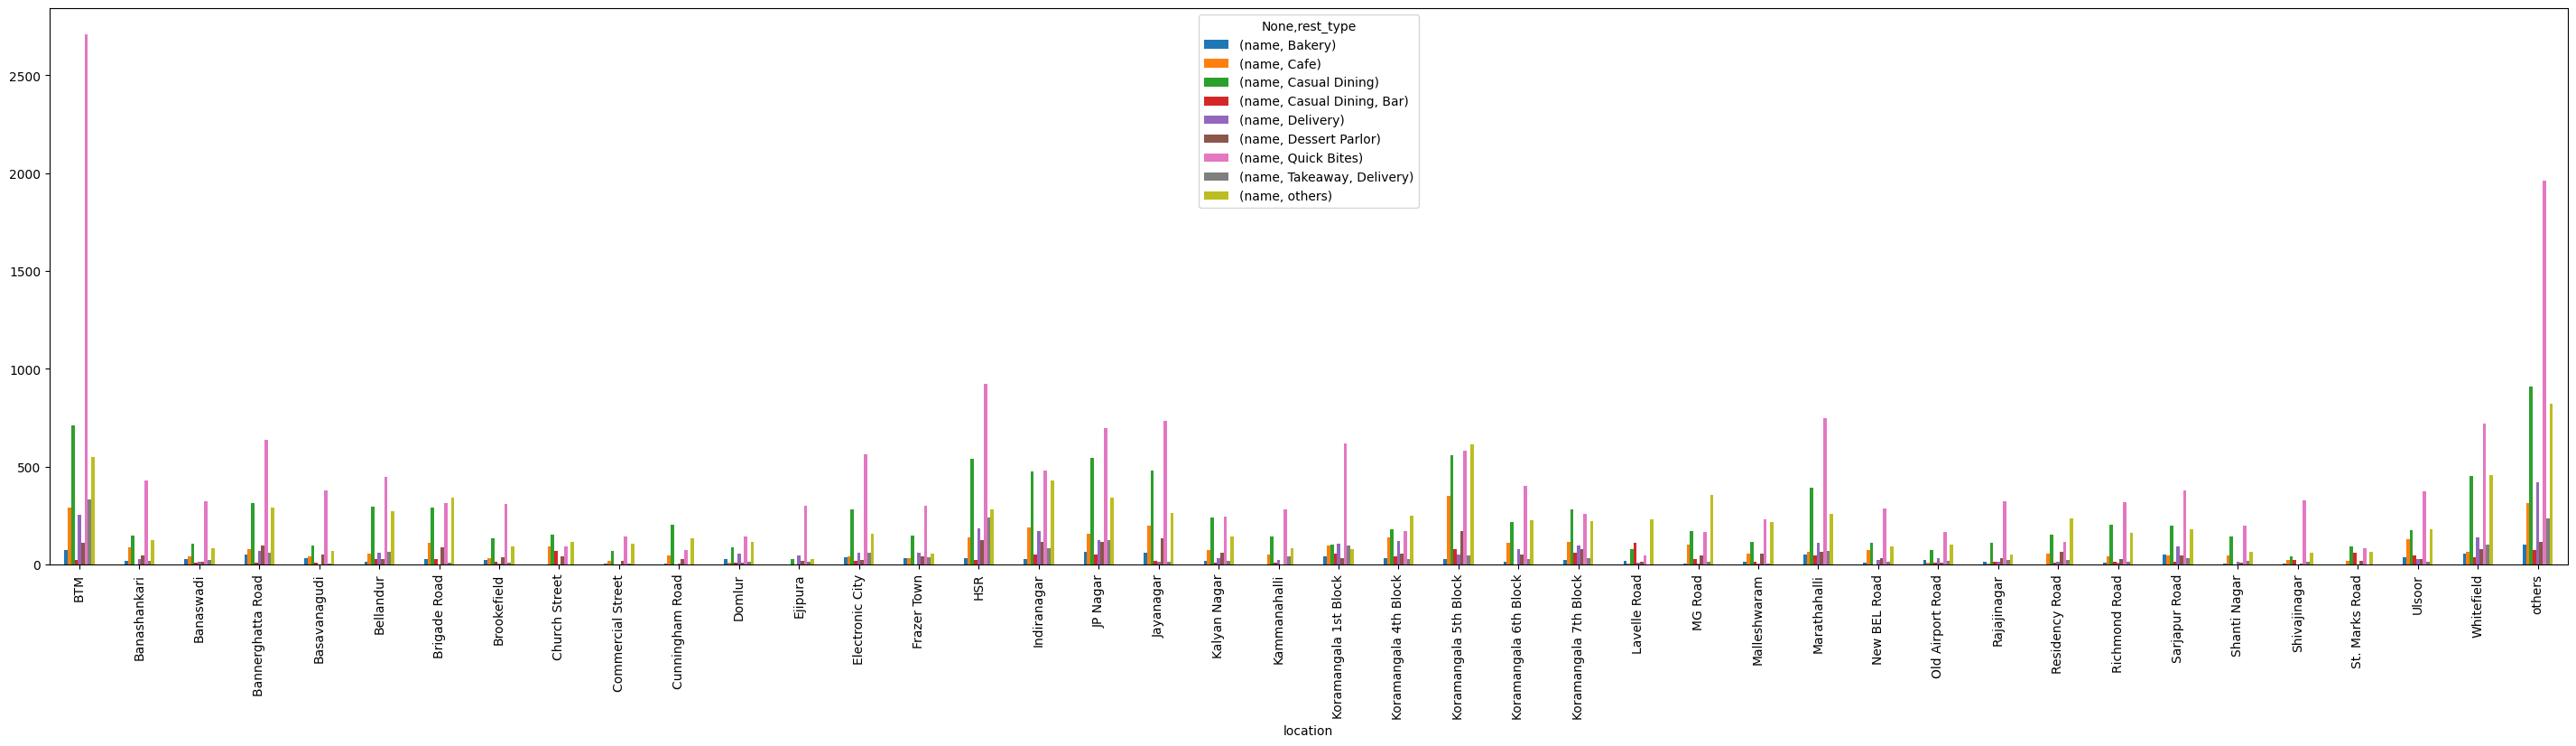

In [49]:
df3.plot(kind='bar',figsize=((36,8)))

**location v/s no of votes**

In [52]:
df.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,others,800.0,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,others,others,600.0,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,others,700.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,others,550.0,Cafes


In [58]:
df4=df[['location','votes']]
df4.drop_duplicates()
df4=df4.groupby(['location'])['votes'].sum()  #same locations cha group banvaycha ani tyachya votes cha sum tyachya samor mandaycha
df4=df4.to_frame()  #sort values function can only be used on dataframe
df4=df4.sort_values('votes',ascending=False)
df4

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522
BTM,573668
others,563807
HSR,498322
Lavelle Road,495777


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

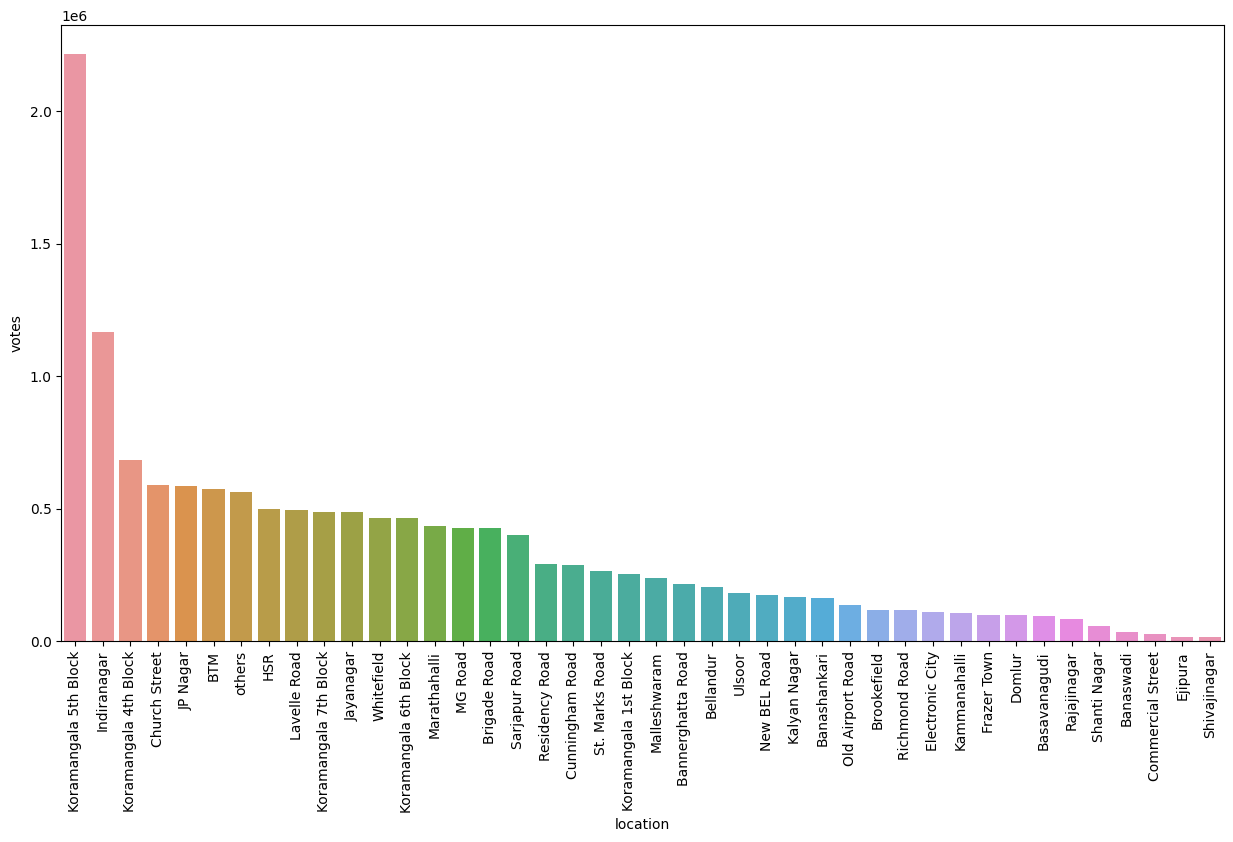

In [62]:
plt.figure(figsize = (15,8))
sns.barplot(x=df4.index, y=df4['votes'])
plt.xticks(rotation = 90)

**cuisines v/s votes**

In [71]:
df5=df[['cuisines','votes']]
df5.drop_duplicates()
df5=df5.groupby(['cuisines'])['votes'].sum()
df5=df5.to_frame()
df5=df5.sort_values('votes',ascending=False)
df5

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
...,...
"Biryani, South Indian",6473
"Kerala, South Indian",6083
"Fast Food, Beverages",5968


In [72]:
df5=df5.iloc[1:,:]  
df5

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728
...,...
"Biryani, South Indian",6473
"Kerala, South Indian",6083
"Fast Food, Beverages",5968


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

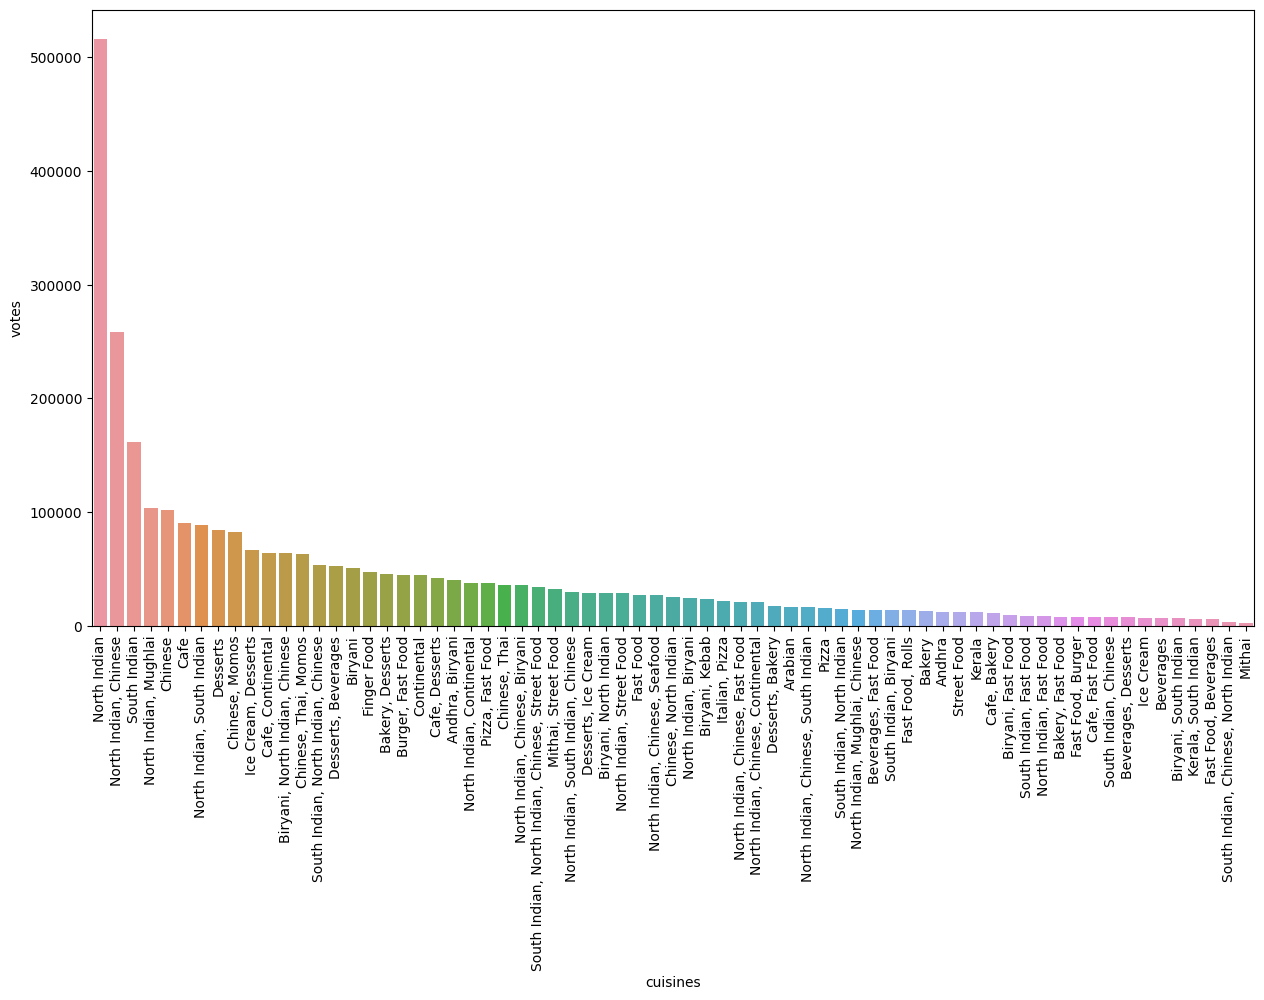

In [74]:
plt.figure(figsize = (15,8))
sns.barplot(x=df5.index ,y=df5['votes'])  #index column of df7 is plotted on x axis
plt.xticks(rotation = 90)